<a href="https://colab.research.google.com/github/ayushnigamsworld/mlNotez/blob/master/googleColabNotebooks/BoardGameReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib
import seaborn
import sklearn
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [0]:
games = pd.read_csv('games.csv')

In [62]:
print(games.head())
#print(games.tail())
#print(games)

       id       type                                       name  yearpublished  minplayers  maxplayers  playingtime  minplaytime  maxplaytime  minage  users_rated  average_rating  bayes_average_rating  total_owners  total_traders  total_wanters  total_wishers  total_comments  total_weights  average_weight
0   12333  boardgame                          Twilight Struggle         2005.0         2.0         2.0        180.0        180.0        180.0    13.0        20113         8.33774               8.22186         26647            372           1219           5865            5347           2562          3.4785
1  120677  boardgame                              Terra Mystica         2012.0         2.0         5.0        150.0         60.0        150.0    12.0        14383         8.28798               8.14232         16519            132           1586           6277            2526           1423          3.8939
2  102794  boardgame                  Caverna: The Cave Farmers         2013.0 

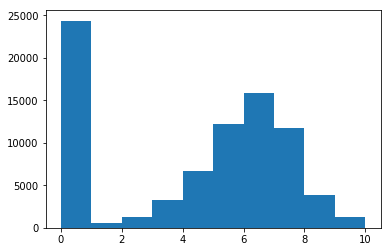

In [63]:
#histogram of average_rating column
plt.hist(games['average_rating'])
plt.show()

In [64]:
#get zero score games
 print(games[games['average_rating'] == 0].iloc[0])
  
 print(games[games['average_rating'] > 0].iloc[0]) 

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

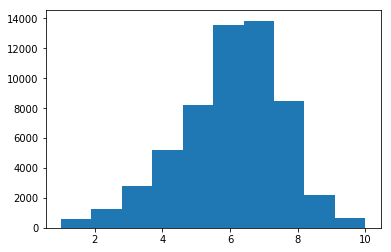

In [65]:
#remove games which hv not been rated
games = games[games['users_rated'] > 0]

#remove rows with any missing values
games = games.dropna(axis=0)
#print(games)

plt.hist(games['average_rating'])
plt.show()

In [66]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight'], dtype='object')


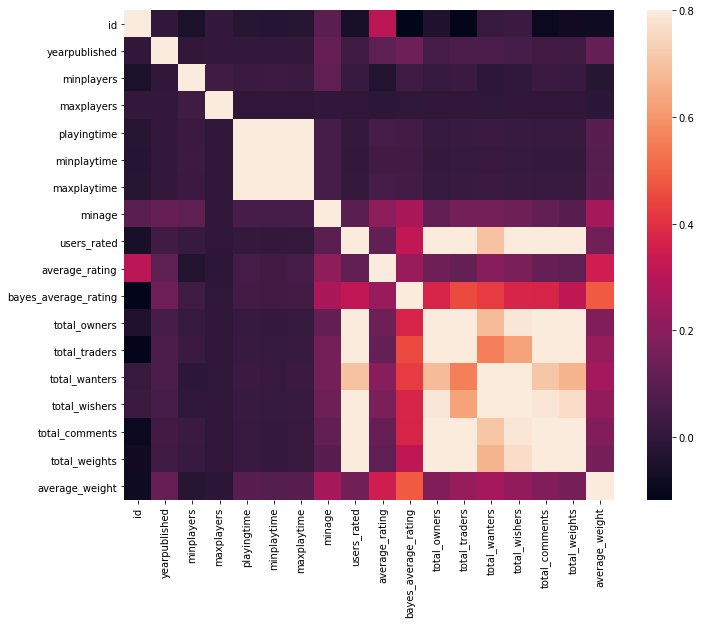

In [67]:
# correlation matrix can tell us if there is some relation between the columns

corrmat = games.corr()

fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax= .8, square= True)
plt.show()

In [0]:
# get all columns and filter columns to remove data we do not want

columns = games.columns.tolist()

# remove columns which maybe highly correlated but not want, so can give wrong info, also since we need to predict average rating so remove that, also type and name dont affect
columns = [c for c in columns if c not in ['bayes_average_rating', 'average_rating', 'type', 'name', 'id']]

# store target
target = 'average_rating'

In [69]:
print(columns)

['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [70]:
# training test
from sklearn.model_selection import train_test_split

# generate training set
train = games.sample(frac=0.8, random_state=1)

test = games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [71]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

#fitting data
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
# generate predictions for test set
predictions = LR.predict(test[columns])

#error
mean_squared_error(predictions, test[target])

2.078819032629323

In [73]:
from sklearn.ensemble import RandomForestRegressor

RFR= RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [74]:
predictions = RFR.predict(test[columns])

mean_squared_error(predictions, test[target])

1.4458560046071653

In [89]:
#test[columns].shape
print(test[columns].iloc[0].values.shape)
print(test[columns].iloc[0].values.reshape(1, -1).shape)

(15,)
(1, 15)


In [91]:
rating_LR =  LR.predict(test[columns].iloc[0].values.reshape(1, -1))
rating_RFR =  RFR.predict(test[columns].iloc[0].values.reshape(1, -1))


print(rating_LR)
print(rating_RFR)  v


[8.12061283]
[7.91373581]


In [79]:
test[target].iloc[0]


8.07933